In [44]:
#importing the bank note dataset
import numpy as np
import pandas as pd
df=pd.read_csv("BankNote_Authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [45]:
#Seperating the input variables from target variable
X=df.drop(["class"], axis = 1)
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [46]:
# Target variable
Y=df["class"]
Y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [47]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

In [48]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [106]:
#importing the necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
# creating the neural network
classifier = Sequential()
classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform', input_dim = 4))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=classifier.fit(X_train, y_train,validation_split = 0.25,  batch_size=10,epochs = 20)


Epoch 1/20
78/78 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.7743 - val_loss: 0.6418 - val_accuracy: 0.8488
Epoch 2/20
78/78 [==============================] - 0s 1ms/step - loss: 0.6276 - accuracy: 0.8444 - val_loss: 0.6038 - val_accuracy: 0.8527
Epoch 3/20
78/78 [==============================] - 0s 1ms/step - loss: 0.5953 - accuracy: 0.8521 - val_loss: 0.5725 - val_accuracy: 0.8605
Epoch 4/20
78/78 [==============================] - 0s 1ms/step - loss: 0.5668 - accuracy: 0.8560 - val_loss: 0.5444 - val_accuracy: 0.8643
Epoch 5/20
78/78 [==============================] - 0s 1ms/step - loss: 0.5415 - accuracy: 0.8599 - val_loss: 0.5195 - val_accuracy: 0.8798
Epoch 6/20
78/78 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.8677 - val_loss: 0.4970 - val_accuracy: 0.8798
Epoch 7/20
78/78 [==============================] - 0s 1ms/step - loss: 0.4975 - accuracy: 0.8729 - val_loss: 0.4766 - val_accuracy: 0.8837
Epoch 8/20
78/78 [==

In [107]:
#predicting 
y_pred = classifier.predict(X_test) > 0.5

In [108]:
# Building confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[185,   6],
       [ 11, 141]], dtype=int64)

In [116]:
# Getting F1_score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))

0.9496080820651093
0.9504373177842566
0.9503430864525351


In [110]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


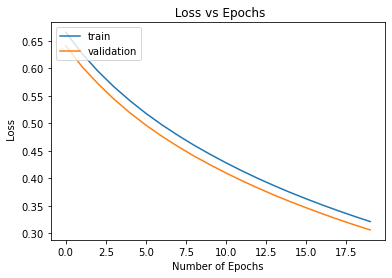

In [113]:
# Visualizing the loss updates with the number of epochs 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(' Loss vs Epochs')
plt.ylabel(' Loss')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


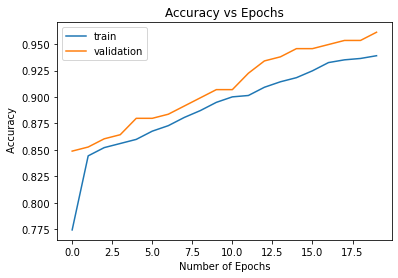

In [114]:
#Visualizing the accuracy updates with the number of epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel(' Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [93]:
# Building the neural network with cross validation and knowing the accuracies   
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 4))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 20)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
accuracies = cross_val_score(estimator = classifier, X = X_train, y =y_train, cv = kfold)
print(accuracies)
mean = accuracies.mean()
print(mean)
variance = accuracies.std()
print(variance)

Epoch 1/20
93/93 [==============================] - 0s 668us/step - loss: 0.6527 - accuracy: 0.8434
Epoch 2/20
93/93 [==============================] - 0s 782us/step - loss: 0.6084 - accuracy: 0.8413
Epoch 3/20
93/93 [==============================] - 0s 762us/step - loss: 0.5722 - accuracy: 0.8413
Epoch 4/20
93/93 [==============================] - 0s 844us/step - loss: 0.5411 - accuracy: 0.8477
Epoch 5/20
93/93 [==============================] - 0s 898us/step - loss: 0.5138 - accuracy: 0.8510
Epoch 6/20
93/93 [==============================] - 0s 829us/step - loss: 0.4894 - accuracy: 0.8585
Epoch 7/20
93/93 [==============================] - 0s 930us/step - loss: 0.4673 - accuracy: 0.8683
Epoch 8/20
93/93 [==============================] - 0s 910us/step - loss: 0.4471 - accuracy: 0.8780
Epoch 9/20
93/93 [==============================] - 0s 864us/step - loss: 0.4283 - accuracy: 0.8866
Epoch 10/20
93/93 [==============================] - 0s 893us/step - loss: 0.4107 - accuracy: 0.8996

93/93 [==============================] - 0s 835us/step - loss: 0.2953 - accuracy: 0.9482
Epoch 20/20
11/11 [==============================] - 0s 776us/step - loss: 0.3085 - accuracy: 0.9417
Epoch 1/20
93/93 [==============================] - 0s 724us/step - loss: 0.6573 - accuracy: 0.7495
Epoch 2/20
93/93 [==============================] - 0s 728us/step - loss: 0.6150 - accuracy: 0.8013
Epoch 3/20
93/93 [==============================] - 0s 718us/step - loss: 0.5792 - accuracy: 0.8197
Epoch 4/20
93/93 [==============================] - 0s 747us/step - loss: 0.5482 - accuracy: 0.8261
Epoch 5/20
93/93 [==============================] - 0s 740us/step - loss: 0.5211 - accuracy: 0.8402
Epoch 6/20
93/93 [==============================] - 0s 751us/step - loss: 0.4966 - accuracy: 0.8510
Epoch 7/20
93/93 [==============================] - 0s 777us/step - loss: 0.4743 - accuracy: 0.8607
Epoch 8/20
93/93 [==============================] - 0s 782us/step - loss: 0.4539 - accuracy: 0.8715
Epoch 9/20

93/93 [==============================] - 0s 824us/step - loss: 0.4385 - accuracy: 0.8790
Epoch 10/20
93/93 [==============================] - 0s 847us/step - loss: 0.4205 - accuracy: 0.8855
Epoch 11/20
93/93 [==============================] - 0s 767us/step - loss: 0.4038 - accuracy: 0.9006
Epoch 12/20
93/93 [==============================] - 0s 783us/step - loss: 0.3881 - accuracy: 0.9082
Epoch 13/20
93/93 [==============================] - 0s 798us/step - loss: 0.3732 - accuracy: 0.9168
Epoch 14/20
93/93 [==============================] - 0s 841us/step - loss: 0.3593 - accuracy: 0.9298
Epoch 15/20
93/93 [==============================] - 0s 763us/step - loss: 0.3461 - accuracy: 0.9352
Epoch 16/20
93/93 [==============================] - 0s 800us/step - loss: 0.3337 - accuracy: 0.9395
Epoch 17/20
93/93 [==============================] - 0s 794us/step - loss: 0.3220 - accuracy: 0.9417
Epoch 18/20
93/93 [==============================] - 0s 770us/step - loss: 0.3108 - accuracy: 0.9438
Ep